In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-21/gdpr_violations.tsv'
data = pd.read_csv(url, sep = '\t')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                250 non-null    int64 
 1   picture           250 non-null    object
 2   name              250 non-null    object
 3   price             250 non-null    int64 
 4   authority         250 non-null    object
 5   date              250 non-null    object
 6   controller        250 non-null    object
 7   article_violated  250 non-null    object
 8   type              250 non-null    object
 9   source            250 non-null    object
 10  summary           250 non-null    object
dtypes: int64(2), object(9)
memory usage: 21.6+ KB


In [ ]:
data.head(3)

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
0,1,https://www.privacyaffairs.com/wp-content/uplo...,Poland,9380,Polish National Personal Data Protection Offic...,10/18/2019,Polish Mayor,Art. 28 GDPR,Non-compliance with lawful basis for data proc...,https://uodo.gov.pl/decyzje/ZSPU.421.3.2019,No data processing agreement has been conclude...
1,2,https://www.privacyaffairs.com/wp-content/uplo...,Romania,2500,Romanian National Supervisory Authority for Pe...,10/17/2019,UTTIS INDUSTRIES,Art. 12 GDPR|Art. 13 GDPR|Art. 5 (1) c) GDPR|A...,Information obligation non-compliance,https://www.dataprotection.ro/?page=A_patra_am...,A controller was sanctioned because he had unl...
2,3,https://www.privacyaffairs.com/wp-content/uplo...,Spain,60000,Spanish Data Protection Authority (AEPD),10/16/2019,Xfera Moviles S.A.,Art. 5 GDPR|Art. 6 GDPR,Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00262-2019...,The company had unlawfully processed the perso...


**Most expensive violation by country, listing the specific violation type e.g failure to comply with processing regulation**

In [ ]:
rank = data.groupby(by='name')['article_violated','type','price'].max()
rank.head(3)

<ipython-input-149-cabad182ae5d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank = data.groupby(by='name')['article_violated','type','price'].max()


,article_violated,type,price
name,,,
Austria,Unknown,Unknown,18000000
Belgium,Art. 6 GDPR|Art. 12 GDPR|Art. 13 GDPR,Several,15000
Bulgaria,Art. 6 GDPR|Art. 5 (1) a) GDPR,Non-compliance with subjects' rights protectio...,2600000


In [ ]:
rank = rank.reset_index().sort_values(by='price',ascending=False)

In [ ]:
rank['price in thousands'] = rank['price'] / 1000
rank.head()

,name,article_violated,type,price,price in thousands
7,France,Art. 5 GDPR|Art. 6 GDPR|Art. 13 GDPR|Art. 14 G...,Several,50000000,50000.000
12,Italy,Art. 58(2) GDPR,Non-cooperation with Data Protection Authority,27802946,27802.946
0,Austria,Unknown,Unknown,18000000,18000.000
8,Germany,Art. 83 (4) a) GDPR|Art. 33 (1) GDPR|Art. 34 (...,https://dataprivacy.foxrothschild.com/2019/01/...,14500000,14500.000
23,Sweden,Art. 6 GDPR,Non-compliance with lawful basis for data proc...,7000000,7000.000


In [ ]:
zoom = rank.iloc[5:,0:5]
zoom.head()

,name,article_violated,type,price,price in thousands
2,Bulgaria,Art. 6 GDPR|Art. 5 (1) a) GDPR,Non-compliance with subjects' rights protectio...,2600000,2600.00
16,Netherlands,Art. 5 GDPR|Art. 6 GDPR,Non-compliance with lawful basis for data proc...,900000,900.00
18,Poland,Art.14 GDPR,Non-compliance with the right of consent,644780,644.78
19,Portugal,Art. 5 (1) f) GDPR|Art. 32 GDPR,Non-compliance with subjects' rights protectio...,400000,400.00
24,United Kingdom,Unknown,Non-compliance with the right of consent,320000,320.00


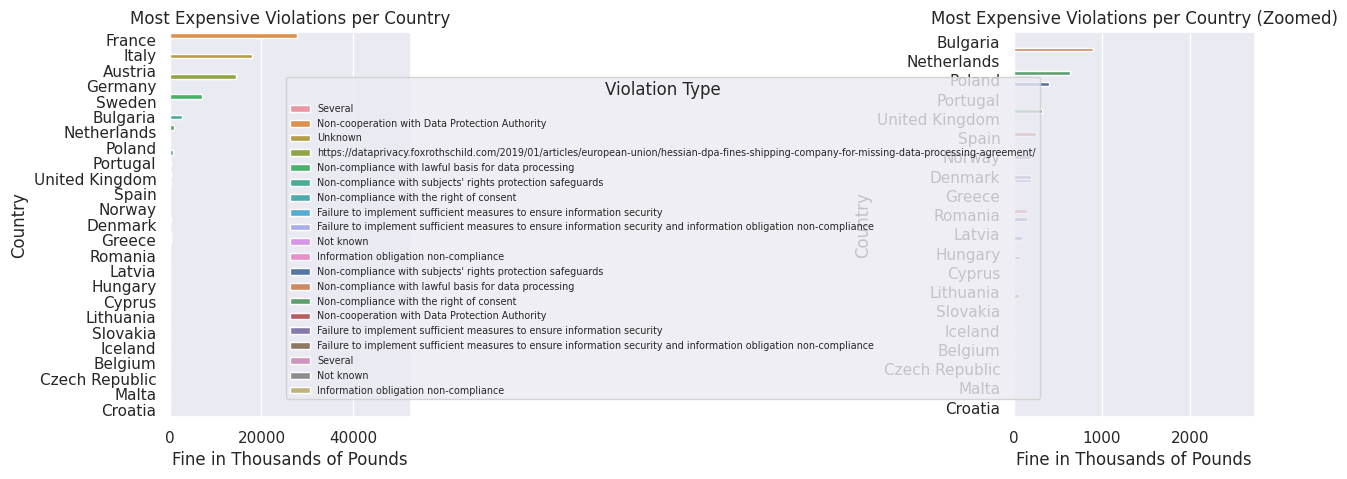

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
plt.subplots_adjust(wspace = 2.5)
sns.barplot(ax = ax1,x='price in thousands',y='name',data=rank,orient='h',hue='type',width=3.5)
ax1.set_title('Most Expensive Violations per Country')
ax1.set_ylabel('Country')
ax1.set_xlabel('Fine in Thousands of Pounds')
sns.barplot(ax = ax2, x='price in thousands',y='name',data=zoom,orient='h',hue='type',width=1.8)
ax2.set_title('Most Expensive Violations per Country (Zoomed)')
ax2.set_ylabel('Country')
ax2.set_xlabel('Fine in Thousands of Pounds')
x0, y0, width, height = 0.75, 0.8, 0, 0
fig.legend(title = 'Violation Type',fontsize='xx-small',bbox_to_anchor=(x0, y0, width, height))
for ax in (ax1,ax2):
    ax.legend([],[], frameon=False)

From the visualization above, we see that among the 25 countries, 
close to 20 separate violations cost the countries the most in fines.
This shows no bias towards any violation and shows that breach of any laws could me very expensive to a country.

**Time breakdown of the total violations in the EU.**

In [ ]:
df = data.sort_values(by='date')
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['article_violated'].value_counts()

Art. 32 GDPR                                                          40
Art. 6 GDPR                                                           33
Art. 5 GDPR|Art. 6 GDPR                                               20
Art. 5 (1) f) GDPR|Art. 32 GDPR                                       10
Art. 15 GDPR                                                          10
                                                                      ..
Art. 5 (1) a)|Art. 7 (3) GDPR                                          1
Art. 5 (1) c) GDPR|Art. 12 GDPR|Art. 13 GDPR|Art. 32 GDPR              1
Art. 33 GDPR                                                           1
Art. 25 (1) GDPR|Art. 5 (1) c) GDPR                                    1
Art. 5 (1) a) GDPR|Art. 5 (1) c) GDPR|Art. 6 (1) GDPR|Art. 13 GDPR     1
Name: article_violated, Length: 88, dtype: int64

In [ ]:
year = df.groupby(df.date.dt.year)['article_violated'].value_counts()
year = year.reset_index(name = 'count')

In [ ]:
year.sort_values(by='count',ascending=False)

,date,article_violated,count
21,2019,Art. 32 GDPR,31
22,2019,Art. 6 GDPR,24
94,2020,Art. 5 GDPR|Art. 6 GDPR,15
23,2019,Art. 15 GDPR,8
95,2020,Art. 32 GDPR,7
...,...,...,...
50,2019,Art. 13 GDPR|Art. 37 GDPR,1
49,2019,Art. 13 GDPR|Art. 14 GDPR|Art. 6 GDPR|Art. 4 G...,1
48,2019,Art. 12 GDPR|Art. 17 GDPR,1
47,2019,Art. 12 GDPR|Art. 15 GDPR|Art. 17 GDPR,1


In [ ]:
new = year.sort_values(by='count',ascending = False).groupby('date')
new.head(2)

,date,article_violated,count
21,2019,Art. 32 GDPR,31
22,2019,Art. 6 GDPR,24
94,2020,Art. 5 GDPR|Art. 6 GDPR,15
95,2020,Art. 32 GDPR,7
0,1970,Art. 6 GDPR,3
1,1970,Art. 5 (1) d) GDPR,2
13,2018,Art. 28 (3) GDPR,1
20,2018,Unknown,1


**Vodafone's GDPR violations in volume.**

In [ ]:
mask = data['controller'].str.contains('Vodafone')
vodafone = data[mask]

In [ ]:
vodafone.head(2)

,id,picture,name,price,authority,date,controller,article_violated,type,source,summary
82,83,https://www.privacyaffairs.com/wp-content/uplo...,Spain,36000,Spanish Data Protection Authority (AEPD),10/25/2019,Vodafone Espana,Art. 5 GDPR|Art. 6 GDPR,Non-compliance with lawful basis for data proc...,https://www.aepd.es/resoluciones/PS-00301-2019...,Vodafone Espana called the complainant to offe...
89,90,https://www.privacyaffairs.com/wp-content/uplo...,Spain,5000,Spanish Data Protection Authority (AEPD),01/01/1970,Vodafone Espana,Art. 5 (1) d) GDPR,Failure to comply with processing principles,https://www.aepd.es/resoluciones/PS-00331-2018...,Vodafone mistakenly charged a customer whose i...


In [ ]:
vodafone['price'].max()

120000

In [ ]:
vodafone['price'].min()

3000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Art. 5 GDPR|Art. 6 GDPR'),
  Text(0, 1, 'Art. 32 GDPR'),
  Text(0, 2, 'Art. 5 (1) f) GDPR'),
  Text(0, 3, 'Art. 5 GDPR'),
  Text(0, 4, 'Art. 5 (1) d) GDPR'),
  Text(0, 5, 'Art. 5 (1) f) GDPR|Art. 32 GDPR'),
  Text(0, 6, 'Art. 6 GDPR'),
  Text(0, 7, 'Art. 6 (1) GDPR'),
  Text(0, 8, 'Art. 58 GDPR')])

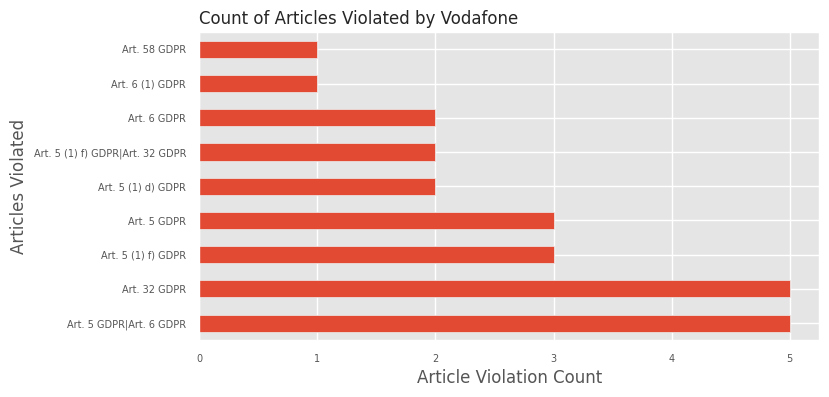

In [ ]:
plt.figure(figsize=(8,4))
vodafone['article_violated'].value_counts().plot(kind='barh')
plt.title('Count of Articles Violated by Vodafone',loc='left',fontsize=12)
ax.tick_params(axis='y',direction='out')
plt.xticks(fontsize=7)
plt.xlabel('Article Violation Count')
plt.ylabel('Articles Violated')
plt.yticks(fontsize=7)

There doesn't seem to be an obvious bias to article violated, with majority of violations being between Art. 32 and Art.5|Art.6 with 5 times each.

Text(0, 0.5, 'No. of Fines')

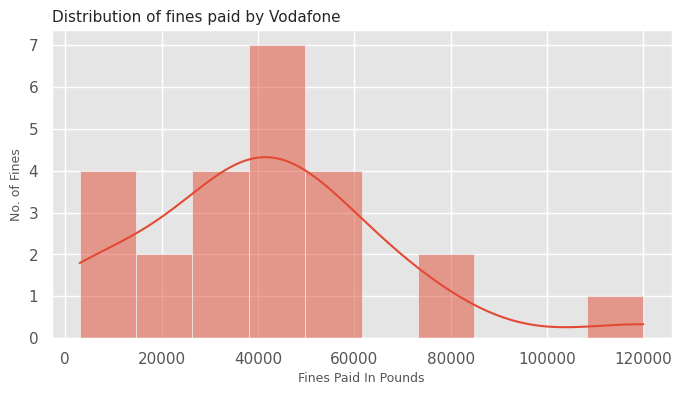

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=vodafone,x='price',bins=10,kde=True)
plt.title('Distribution of fines paid by Vodafone',fontsize=11,loc='left')
plt.xlabel('Fines Paid In Pounds',fontsize = 9)
plt.ylabel('No. of Fines',fontsize = 9)

The visualizations shows the majority of fines paid out by Vodafone being around the 5000 pounds region.



*   Max payout : 120000
*   Least payout : 3000



**Companies with the highest violations.**

In [ ]:
high = data.groupby(by='controller')['price'].sum()

In [ ]:
high = high.reset_index().sort_values(by='price',ascending=False).head(10)

In [ ]:
high['fine in millions'] = high['price'] / 1000000 

Text(0, 0.5, 'Controller')

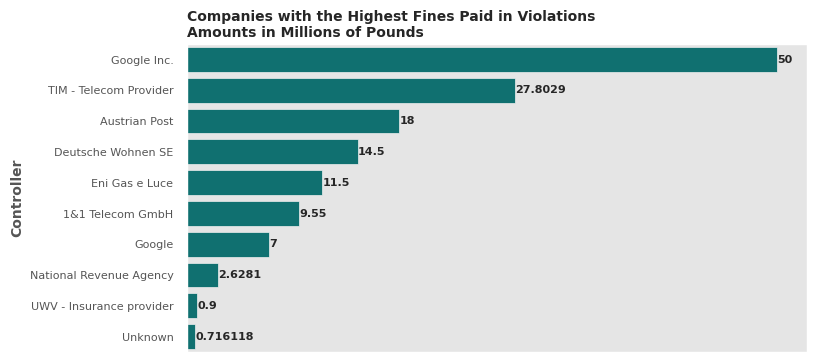

In [ ]:
fig,ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=high,x='fine in millions',y='controller',orient='h',color='teal')
for i in ax.containers:
    ax.bar_label(i,fontsize=8,fontweight='bold')
plt.title("Companies with the Highest Fines Paid in Violations\nAmounts in Millions of Pounds",pad=5,fontsize=10,weight='bold',loc='left')
ax.get_xaxis().set_visible(False)
plt.yticks(fontsize=8)
plt.ylabel('Controller',fontsize=10,weight='bold')


The above plot takes a look at the 10 'Biggest Losers' in terms of fines paid out and the respective companies.

The companies see to involve a mix of Tech(Google & Google Inc), Telecommuniaction (TIM - Telcom, 1&1 Telecom) and even an insurance company.

However, the bulk of the fines paid vary greatly, with the leading, Google Inc paying over 50 times the item ranking 9th and close to doubling the 2nd placed!!!


**Breakdown / Distribution and important metrics of fines levied per article.**

In [ ]:
data['article_violated'].value_counts().head(6)

Art. 32 GDPR                       40
Art. 6 GDPR                        33
Art. 5 GDPR|Art. 6 GDPR            20
Art. 15 GDPR                       10
Art. 5 GDPR                        10
Art. 5 (1) f) GDPR|Art. 32 GDPR    10
Name: article_violated, dtype: int64

In [ ]:
df = data.loc[data['article_violated'].isin(['Art. 32 GDPR','Art. 6 GDPR','Art. 5 GDPR|Art. 6','GDPR,Art. 15 GDPR','Art. 5 GDPR','Art. 5 (1) f) GDPR|Art. 32 GDPR'])]

In [ ]:
df['thousands'] = df['price'] / 1000 

<ipython-input-171-e59d82fbe375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['thousands'] = df['price'] / 1000


Text(0.5, 0, 'Fines in Thousands of Pounds')

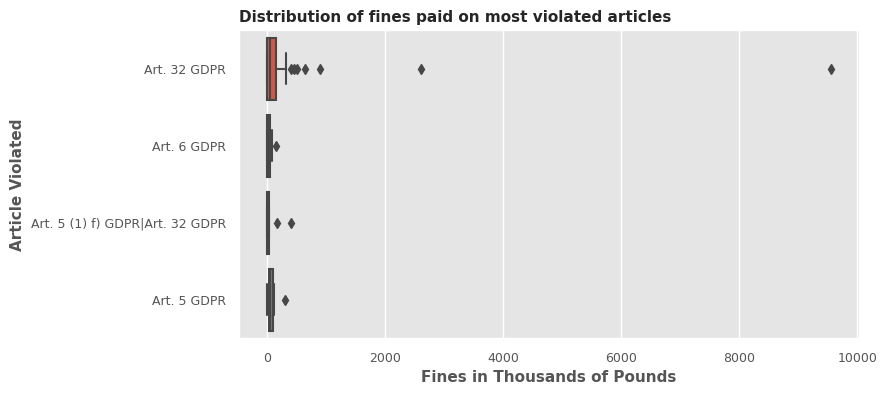

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df,x='thousands',y='article_violated',orient='h')
plt.title('Distribution of fines paid on most violated articles',loc='left',fontsize=11,weight='bold')
plt.yticks(fontsize=9)
plt.ylabel('Article Violated',fontsize=11,weight='bold')
plt.xticks(fontsize=9)
plt.xlabel('Fines in Thousands of Pounds',fontsize=11,weight='bold')

**Getting rid of outliers to visualize the distribution better.**

In [ ]:
new = df.drop(df[df['thousands'] > 2000].index)

Text(0.5, 21.249999999999993, 'Fines in Thousands of Pounds')

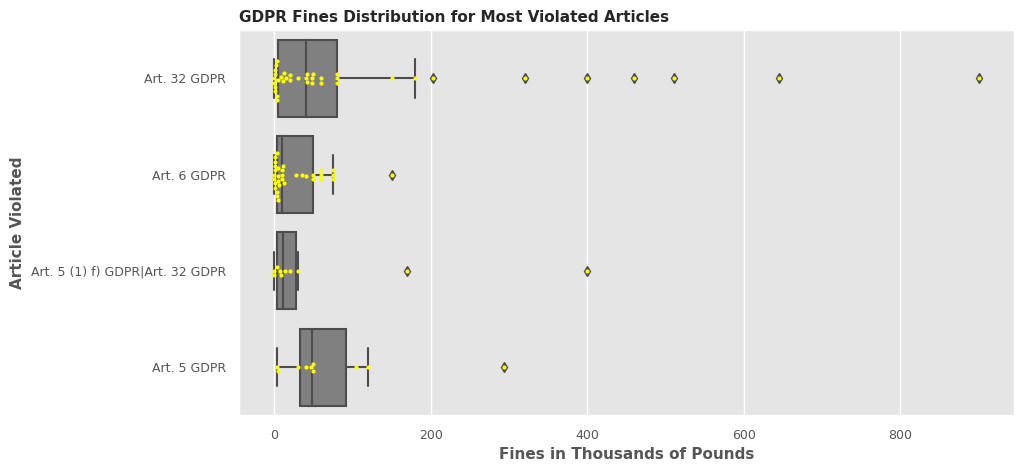

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=new,x='thousands',y='article_violated',orient='h',color='grey')
ax = sns.swarmplot(x='thousands', y='article_violated', data=new, color="yellow",size=3)
plt.title('GDPR Fines Distribution for Most Violated Articles',loc='left',fontsize=11,weight='bold')
plt.yticks(fontsize=9)
plt.ylabel('Article Violated',fontsize=11,weight='bold')
plt.xticks(fontsize=9)
plt.xlabel('Fines in Thousands of Pounds',fontsize=11,weight='bold')

An indepth look shows majority of the violations attracting an almost similar fine range of a few thousand dollars, with most fines being below the median price in most instances.

However, breach of some articles ie, Art. 32 as well as the rest on rare instances have attracted fines of close to 1000 pounds!!

Could be worth looking into, but could also indicate the unpredictable risks of breaching the laws.

**Top 10 most violated articles**

In [ ]:
df3 = data['article_violated'].value_counts().head(10).reset_index(name='count')

In [ ]:
df3

,index,count
0,Art. 32 GDPR,40
1,Art. 6 GDPR,33
2,Art. 5 GDPR|Art. 6 GDPR,20
3,Art. 15 GDPR,10
4,Art. 5 GDPR,10
5,Art. 5 (1) f) GDPR|Art. 32 GDPR,10
6,Art. 5 (1) f) GDPR,7
7,Art. 13 GDPR,7
8,Art. 5 (1) a) GDPR|Art. 6 GDPR,6
9,Art. 5 (1) c) GDPR,6


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

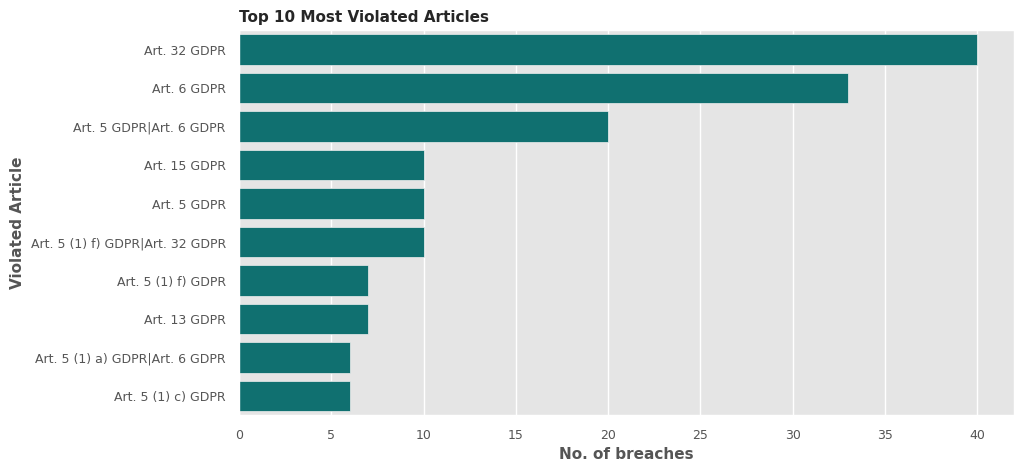

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df3,x='count',y='index',orient='h',color='teal')
plt.title('Top 10 Most Violated Articles',loc='left',weight='bold',fontsize=11)
plt.ylabel('Violated Article',fontsize=11,weight='bold')
plt.yticks(fontsize=9)
plt.xlabel('No. of breaches',fontsize=11,weight='bold')
plt.xticks(fontsize=9)

Art. 32 and Art.6 are the clear standouts racking up the large chunk of violations within the region.

**Article with the highest associated fine**

In [ ]:
df2 = data.groupby(by='article_violated')['price'].max().sort_values(ascending=False).head(10).reset_index()


Text(0, 0.5, 'Article_Violated')

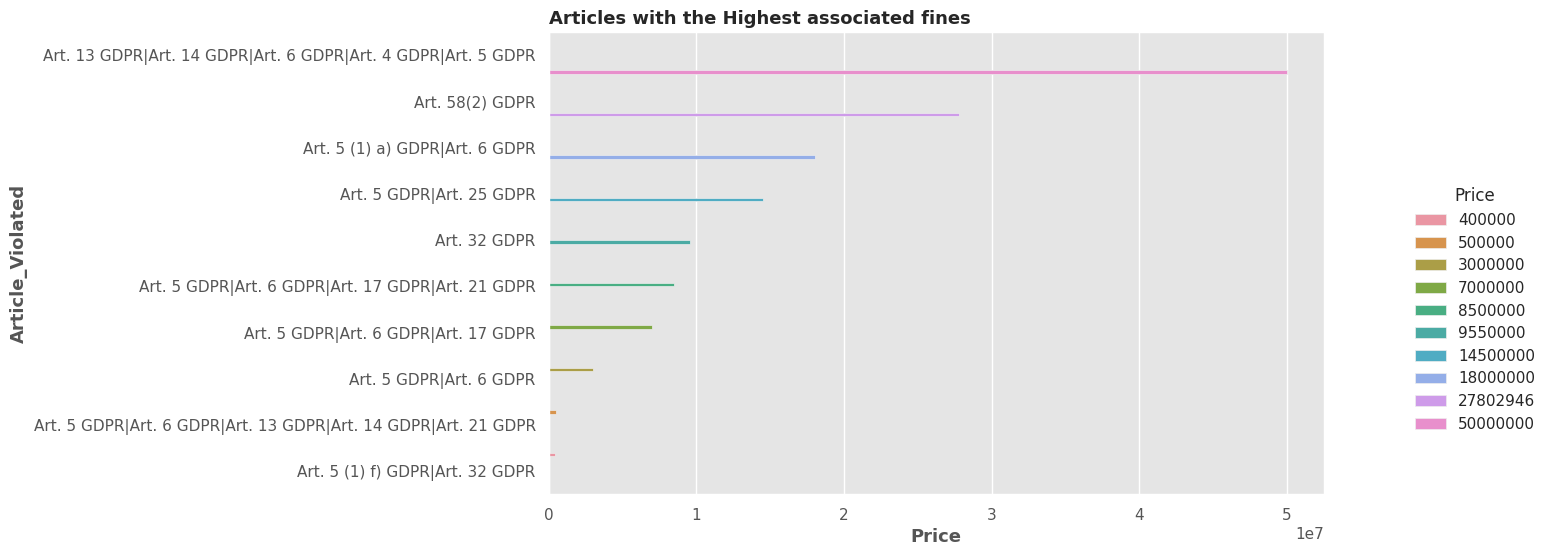

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df2,x='price',y='article_violated',orient='h',hue='price')
plt.title('Articles with the Highest associated fines',loc='left',weight='bold',fontsize=13)
plt.legend(bbox_to_anchor=(1.10, 0.4), loc='center left',title='Price',title_fontsize='large',frameon=False,fontsize=11)
plt.xlabel('Price',fontsize=13,weight='bold')
plt.ylabel('Article_Violated',fontsize=13,weight='bold')